<a href="https://colab.research.google.com/github/EuiHanJung/DataBeginner/blob/main/Chapter2_Tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장 텐서플로우

Tensorflow 버전 : 직접 미분한 방법을 사용한 예시

x, y 데이터 세트가 있을 때, 이차 방정식 y = w1x^2 + w2x + b를 만족하는

parameter w1, w2, b를 추정한다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# y = 2x^2 + 3x + 5 일 때 x, y 데이터 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
x, y

(array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
        -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
        -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
        -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
        -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
        -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
        -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
        -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
        -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
        -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
        -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
         2.0

In [5]:
# x, y 만족하는 w1, w2, b를 찾는다.
# y = w1x^2 + w2x + b -->  w1 = 2, w2 = 3, b = 5가 나와야 한다.
lr = 0.01   # learning rate

In [7]:
# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
w1, w2, b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>)

In [8]:
histLoss = []
for epoch in range(1000):
    with tf.GradientTape() as tape:
        # loss 함수 : root mean squared error
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1 * x * x + w2 * x + b - y)))
        
        # loss에 대한 각 variable들의 미분값을 계산한다.
        dw1, dw2, db = tape.gradient(loss, [w1, w2, b])
        
    # variable들을 업데이트한다 (Gradient descent)
    w1.assign_sub(lr * dw1)     # w1 <- w1 - lr * dw1의 의미
    w2.assign_sub(lr * dw2)     # w2.assign(w2 - lr * dw2.numpy())와 동일함
    b.assign_sub(lr * db)
    
    if epoch % 10 == 0:
        histLoss.append(loss.numpy())
        print("epoch = %d, loss = %.4f" % (epoch, loss.numpy()))

print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

epoch = 0, loss = 15.3396
epoch = 10, loss = 7.1791
epoch = 20, loss = 5.3826
epoch = 30, loss = 4.7400
epoch = 40, loss = 4.1643
epoch = 50, loss = 3.6579
epoch = 60, loss = 3.2357
epoch = 70, loss = 2.9064
epoch = 80, loss = 2.6668
epoch = 90, loss = 2.5011
epoch = 100, loss = 2.3874
epoch = 110, loss = 2.3059
epoch = 120, loss = 2.2426
epoch = 130, loss = 2.1889
epoch = 140, loss = 2.1400
epoch = 150, loss = 2.0936
epoch = 160, loss = 2.0483
epoch = 170, loss = 2.0036
epoch = 180, loss = 1.9592
epoch = 190, loss = 1.9148
epoch = 200, loss = 1.8706
epoch = 210, loss = 1.8263
epoch = 220, loss = 1.7820
epoch = 230, loss = 1.7378
epoch = 240, loss = 1.6935
epoch = 250, loss = 1.6493
epoch = 260, loss = 1.6050
epoch = 270, loss = 1.5608
epoch = 280, loss = 1.5165
epoch = 290, loss = 1.4723
epoch = 300, loss = 1.4280
epoch = 310, loss = 1.3838
epoch = 320, loss = 1.3396
epoch = 330, loss = 1.2953
epoch = 340, loss = 1.2511
epoch = 350, loss = 1.2068
epoch = 360, loss = 1.1626
epoch = 370

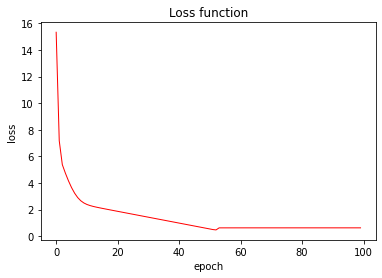

In [9]:
plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()